assess the goodness of fit of a linear regression model

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [284]:
df = pd.read_csv('covid19.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,2/28/2023,3/1/2023,3/2/2023,3/3/2023,3/4/2023,3/5/2023,3/6/2023,3/7/2023,3/8/2023,3/9/2023
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/2023
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [286]:
df.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/2020           0
                 ... 
3/5/2023            0
3/6/2023            0
3/7/2023            0
3/8/2023            0
3/9/2023            0
Length: 1147, dtype: int64

In [287]:
categorical_data = df.select_dtypes(include=['object','category'])
numerical_data = df.select_dtypes(include=['int','float'])
for x in categorical_data:
    df[x].fillna(df[x].mode()[0], inplace=True)
df.isnull().sum()


for x in numerical_data:
    df[x].fillna(np.mean(df[x]), inplace=True)
df.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/2020         0
                 ..
3/5/2023          0
3/6/2023          0
3/7/2023          0
3/8/2023          0
3/9/2023          0
Length: 1147, dtype: int64

In [288]:
encoder = LabelEncoder()
category = df.select_dtypes(include=['object','category'])
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,2/28/2023,3/1/2023,3/2/2023,3/3/2023,3/4/2023,3/5/2023,3/6/2023,3/7/2023,3/8/2023,3/9/2023
0,0,0,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,0,1,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,0,2,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,0,3,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,0,4,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


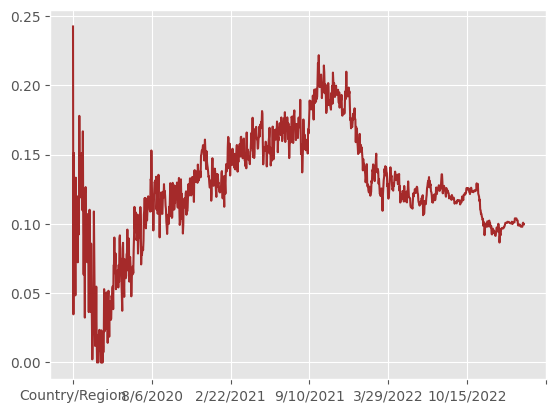

In [289]:
x = df.drop (['Province/State'], axis=1)
y = df['Province/State']
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
importance = mutual_info_regression(x,y)
plt.style.use('ggplot')
feature_impor = pd.Series(importance,x.columns[0:len(x.columns)])
feature_impor.plot(kind = 'line', color = 'brown')
plt.show()


In [290]:
df['Province/State'].value_counts()

Province/State
0     199
69      1
66      1
50      1
47      1
     ... 
21      1
20      1
12      1
5       1
82      1
Name: count, Length: 91, dtype: int64

In [291]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2,random_state=1)

In [292]:
LinearModel = LinearRegression()
LinearModel.fit(xtrain,ytrain)

LinearRegression()

In [293]:
pred1 = LinearModel.predict(xtest)
pred1

array([-6.23488435e+02, -3.24795401e+02, -8.19906078e+02,  6.64395147e+01,
        1.36216316e+04,  2.34339326e+03,  2.18132628e+02, -3.04228754e+03,
       -3.33856157e+02, -4.33976767e+04,  5.03277949e+01, -1.28151190e+03,
        7.57702389e+03, -1.47396199e+04,  3.93892230e+03,  1.41860795e+04,
        7.33784058e+03,  5.83288419e+01, -4.30277646e+04, -1.33114845e+00,
       -3.49608270e+04, -4.14066165e+01, -3.86841388e+04,  2.92017193e+01,
        9.01351398e+03, -1.58088570e+02,  8.42634774e+02, -9.91112136e+01,
        8.01012998e+02, -2.91938689e+01, -1.65661049e+02,  3.12396394e+03,
       -1.48917441e+01,  8.34281735e+01,  7.71390827e+03,  6.56522952e+03,
        3.33313329e+04, -4.24065247e+01, -6.04382038e+03, -9.95972766e+04,
       -3.65308618e+02, -1.30511532e+03,  3.94933908e+04, -2.48596135e+03,
        1.01276727e+03, -3.60330121e+02, -3.24501528e+04, -2.19045608e+03,
       -3.73062697e+03,  1.78214568e+03, -5.45280164e+01, -2.15021068e+03,
       -9.37698422e+02, -

In [294]:
print('MAE', mean_absolute_error(ytest,pred1))
print('MAPE', mean_absolute_percentage_error(ytest,pred1))
print('MSE', mean_squared_error(ytest,pred1))
print('R2 SCORE',r2_score(ytest,pred1))

MAE 8868.385446623603
MAPE 3.607285217470391e+19
MSE 374224190.98558897
R2 SCORE -505950.44792526594


In [295]:
outcome = {
    'Actual Price': ytest,
    'predicted price':pred1

} 
df3 = pd.DataFrame(outcome)
df3

,Actual Price,predicted price
132,0,-623.488435
265,6,-324.795401
230,0,-819.906078
62,20,66.439515
110,0,13621.631585
27,0,2343.393256
91,89,218.132628
187,0,-3042.287538
85,74,-333.856157
218,0,-43397.676679


<Axes: xlabel='Province/State'>

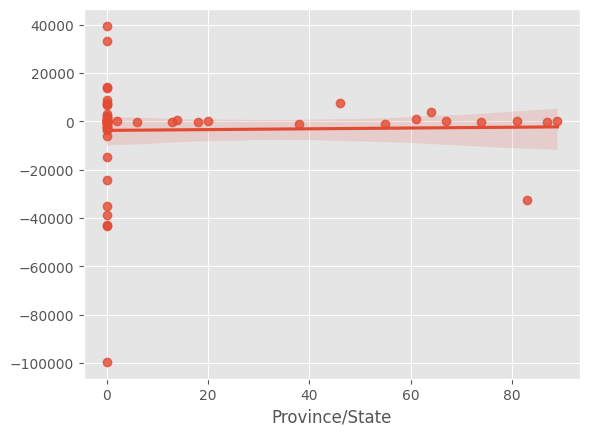

In [296]:
sns.regplot(x = ytest, y = pred1)


In [297]:
tree = DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [298]:
pred2 = tree.predict(xtest)
pred2

array([ 0., 10.,  0., 71.,  0.,  0., 40.,  0., 21.,  0., 65., 80.,  0.,
        0.,  0.,  0.,  0.,  5.,  0., 10.,  0., 56.,  0., 54.,  0., 43.,
        0.,  0., 80.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 39.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [299]:
print('MAE', mean_absolute_error(ytest,pred2))
print('MAPE', mean_absolute_percentage_error(ytest,pred2))
print('MSE', mean_squared_error(ytest,pred2))
print('R2 SCORE',r2_score(ytest,pred2))

MAE 9.96551724137931
MAPE 4969489243995030.0
MSE 481.7586206896552
R2 SCORE 0.3486619049226658


In [300]:
outcome = {
    'Actual Price': ytest,
    'predicted price':pred2

} 
df3 = pd.DataFrame(outcome)
df3

,Actual Price,predicted price
132,0,0.0
265,6,10.0
230,0,0.0
62,20,71.0
110,0,0.0
27,0,0.0
91,89,40.0
187,0,0.0
85,74,21.0
218,0,0.0


<Axes: xlabel='Province/State'>

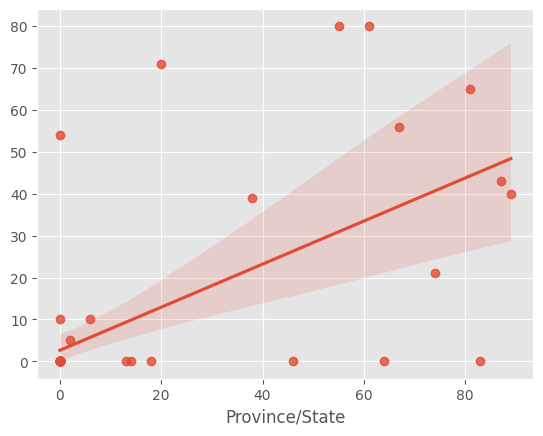

In [301]:
sns.regplot(x = ytest, y = pred2)


In [302]:
forest = RandomForestRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [303]:
pred3 = tree.predict(xtest)
pred3

array([ 0., 10.,  0., 71.,  0.,  0., 40.,  0., 21.,  0., 44., 79.,  0.,
        0.,  4.,  0.,  0.,  5.,  0.,  3.,  0., 56.,  0.,  0.,  0., 43.,
        0.,  0., 79.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  3.,  0.,  0.])

In [304]:
print('MAE', mean_absolute_error(ytest,pred3))
print('MAPE', mean_absolute_percentage_error(ytest,pred3))
print('MSE', mean_squared_error(ytest,pred3))
print('R2 SCORE',r2_score(ytest,pred3))

MAE 9.275862068965518
MAPE 232944808312267.28
MSE 439.48275862068965
R2 SCORE 0.405818909042973


In [305]:
outcome =  {
    'Actual Price': ytest,
    'predicted price':pred2

} 
df3 = pd.DataFrame(outcome)
df3

,Actual Price,predicted price
132,0,0.0
265,6,10.0
230,0,0.0
62,20,71.0
110,0,0.0
27,0,0.0
91,89,40.0
187,0,0.0
85,74,21.0
218,0,0.0


<Axes: xlabel='Province/State'>

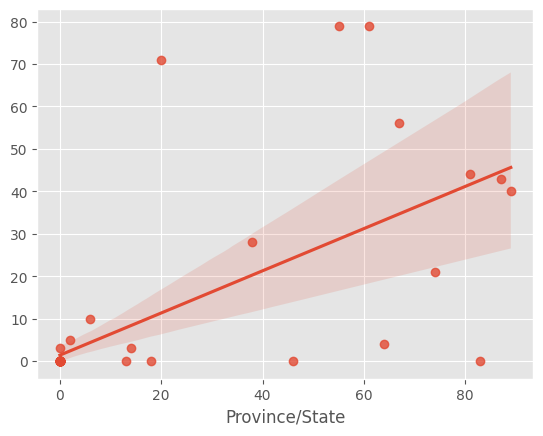

In [306]:
sns.regplot(x = ytest, y = pred3)
